<a href="https://colab.research.google.com/github/shaqas86/Langgraph_EcoSystem/blob/main/Panaversity_Profile_Builder_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_google_genai langchain_community tavily-python langchain_community

In [14]:
import os
from google.colab import userdata

os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Panaversity_Profile_Builder_Agent"
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
gemini_api_key = userdata.get('GEMINI_API_KEY')
tavily_api_key = userdata.get('TAVILY_API_KEY')

In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

llm.invoke("greet me")

AIMessage(content='Hello there!\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-8b483c4f-2d6f-4020-b103-fc22b2522cf0-0', usage_metadata={'input_tokens': 3, 'output_tokens': 4, 'total_tokens': 7, 'input_token_details': {'cache_read': 0}})

In [70]:
# from typing_extensions import Annotated,TypedDict
# from langgraph.graph.message import add_messages
# from langchain_core.messages import SystemMessage
# from langgraph.graph import START, StateGraph, MessagesState
# from langgraph.prebuilt import tools_condition, ToolNode
# from langgraph.graph.state import CompiledStateGraph

# class State(TypedDict):
#     messages:Annotated[list, add_messages]

# # Tools for profile data extraction or calculation can be added
# def collect_name(first_name: str, last_name: str) -> str:
#     """Combines first name and last name into a full name."""
#     return f"{first_name} {last_name}"

# def collect_city(city: str) -> str:
#     """Returns the city name."""
#     return city


# # Binding tools for data collection
# tools = [collect_name, collect_city]

# llm_with_tools = llm.bind_tools(tools)

# # System message
# sys_msg = SystemMessage(
#     content="You are a helpful assistant assisting users in creating and managing their profile information.")

# # Node for profile builder
# def profile_builder(state: State):
#     """Builds the user's profile."""
#     print("----- Chatbot Node -----")
#     messages = state.get("messages", [])
#     messages.append(sys_msg)
#     print("messages>>>>>>>>>>>>>>", messages)
#     return {"messages": [llm_with_tools.invoke(messages)]}

# # Build graph
# builder: StateGraph = StateGraph(State)
# builder.add_node("profile_builder", profile_builder)
# builder.add_node("tools", ToolNode(tools))
# builder.add_edge(START, "profile_builder")
# builder.add_conditional_edges(
#     "profile_builder",
#     tools_condition,
# )
# builder.add_edge("tools", "profile_builder")

# # Compile graph
# graph: CompiledStateGraph = builder.compile()

In [119]:
from typing_extensions import Annotated,TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import SystemMessage
from langgraph.graph import START, StateGraph, MessagesState
from langgraph.prebuilt import tools_condition, ToolNode
from langgraph.graph.state import CompiledStateGraph

class State(TypedDict):
    messages:Annotated[list, add_messages]

# Tools for profile data extraction or calculation can be added
def collect_name(first_name: str, last_name: str) -> str:
    """Combines first name and last name into a full name."""
    return f"{first_name} {last_name}"

def collect_city(city: str) -> str:
    """Returns the city name."""
    return city


# Binding tools for data collection
tools = [collect_name, collect_city]

llm_with_tools = llm.bind_tools(tools)

# System message
sys_msg = SystemMessage(
    content="You are a helpful assistant assisting users in creating and managing their profile information.")

# Node for profile builder
def profile_builder(state: State):
    """Builds the user's profile."""
    messages = state.get("messages", [])
    # Prepend the system message at the beginning of the list of messages
    messages = [sys_msg] + messages
    # print("messages>>>>>>>>>>>>>>", messages)
    # Invoke the language model with the messages
    res=llm_with_tools.invoke(messages)
    # print("res>>>>>>>>>>>>>>", res)
    state["messages"] = [res]
    return state

# Build graph
builder: StateGraph = StateGraph(State)
builder.add_node("profile_builder", profile_builder)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "profile_builder")
builder.add_conditional_edges(
    "profile_builder",
    tools_condition,
)
builder.add_edge("tools", "profile_builder")

# Compile graph
graph: CompiledStateGraph = builder.compile()

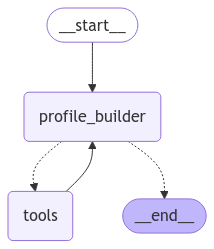

In [120]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))

except Exception as e:
  pass

In [121]:
result = graph.invoke({"messages": "what is my name and where do i live?"})
result ["messages"][-1].content

'I need more information to answer.  What is your first name, last name, and city?\n'

In [122]:
config = {"configurable":{"thread_id":"7"}}

In [96]:
# # Invoking Parameter for dynamic input
# def stream_graph_updates(user_input: str):
#     for events in graph.stream({"messages": user_input}, config, stream_mode="values"):
#         for event in events.values():
#             # Check if 'event' has a 'messages' key
#             if isinstance(event, dict) and "messages" in event:
#                 # Access the last message
#                 last_message = event["messages"][-1]
#                 print(last_message)
#             else:

#                 print("Unexpected event structure:", event)

# while True:
#     try:
#         user_input = input("")
#         if user_input.lower() in ["quit", "exit", "q"]:
#             print("Goodbye!")
#             break

#         stream_graph_updates(user_input)
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         break


hello
Unexpected event structure: [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='70a8d25e-5a76-49c7-9595-e68efc23ef4a')]
messages>>>>>>>>>>>>>> [SystemMessage(content='You are a helpful assistant assisting users in creating and managing their profile information.', additional_kwargs={}, response_metadata={}), HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='70a8d25e-5a76-49c7-9595-e68efc23ef4a')]
res>>>>>>>>>>>>>> content='Hello! How can I help you today?\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-16318a4e-64a1-4bca-92fd-c4588a4858d0-0' usage_metadata={'input_tokens': 117, 'output_tokens': 10, 'total_tokens': 127, 'input_token_details': {'cache_read': 0}}
Unexpected event structure: [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='70a8d25e-5a76-49c7-9595-e68efc23ef4a'), AIMessage(c

In [124]:
# Invoking Parameter for dynamic input
def stream_graph_updates(user_input: str):
    # Ensure user input is correctly formatted as a list of messages
    input_message = {"messages": user_input}

    for events in graph.stream(input_message, config, stream_mode="values"):
        for event in events.values():
            # Check if the event contains a list of messages
            if isinstance(event, list):
                # Access the last message in the list
                last_message = event[-1]
                print("Last AI Message:", last_message)
            else:
                print("Unexpected event structure:", event)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User: hello
Last AI Message: content='hello' additional_kwargs={} response_metadata={} id='c129a714-2e3d-48f7-937e-339396403b94'
Last AI Message: content='Hello! How can I help you today?\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-6ecf6676-3052-4eca-9b49-42af3018c300-0' usage_metadata={'input_tokens': 117, 'output_tokens': 10, 'total_tokens': 127, 'input_token_details': {'cache_read': 0}}
User: q
Goodbye!


In [55]:
# #Invoking Parameter for dynamic input
# def stream_graph_updates(user_input: str):
#     for events in graph.stream({"messages": [user_input]},config, stream_mode="values"):
#       for event in events.values():
#            event["messages"][-1]

# while True:
#     try:
#         user_input = input("")
#         if user_input.lower() in ["quit", "exit", "q"]:
#             print("Goodbye!")
#             break

#         stream_graph_updates(user_input)
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         break


hi
An error occurred: list indices must be integers or slices, not str


In [105]:
print(graph.invoke({"messages": ["what is my name and where do i live?"]}))


{'messages': [HumanMessage(content='what is my name and where do i live?', additional_kwargs={}, response_metadata={}, id='0969c01c-ba64-4c44-916e-9f9c12b2f1a4'), AIMessage(content='I need more information to answer.  What is your first name, last name, and city?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-a2f8afb8-0669-41a4-ad95-31eafeda2e76-0', usage_metadata={'input_tokens': 126, 'output_tokens': 21, 'total_tokens': 147, 'input_token_details': {'cache_read': 0}})]}


In [123]:
for events in graph.stream({"messages": "what can you do for me?"},config, stream_mode="values"):
  for event in events.values():
    print(event[-1].content)

what can you do for me?
I can help you create and manage your profile information.  I can combine your first and last names to create a full name, and I can record your city.

